# **Procesamiento de Datos Digitalizados para Definir una Fuente en FLUKA**

#### **Descripción del Propósito**

El objetivo es transformar una imagen digitalizada en un conjunto de datos que FLUKA pueda interpretar. La curva negra en **No_Shielding.jpeg** representa la distribución de energía de una fuente de partículas. Este código:

- **Digitaliza los datos** (previamente extraídos con herramientas como [WebPlotDigitizer](https://automeris.io/WebPlotDigitizer)).

- **Genera un archivo** `No_Shielding.csv` con las columnas requeridas por FLUKA: `Emin`, `Emax`, y `dN/dE`.

In [1]:
# Librerias Necesarias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


# **Visualización de la Imagen Original:**
- El código permite cargar y mostrar la imagen original (No_Shielding.jpeg) para referencia visual, usando:

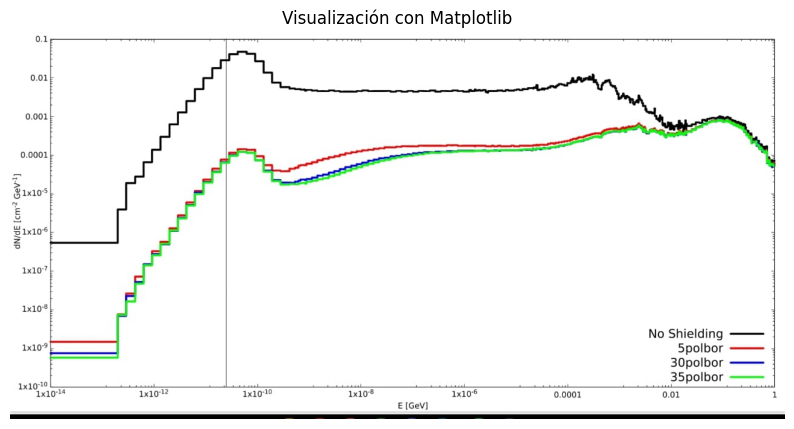

In [2]:
# Cargar la imagen
image_path = 'No_Shielding.jpeg'  # Cambia por el nombre de tu archivo
image = mpimg.imread(image_path)

# Mostrar la imagen
plt.figure(figsize=(10, 6))
plt.imshow(image)
plt.axis('off')  # Ocultar los ejes
plt.title("Visualización con Matplotlib")
plt.show()

# **Procesar y Graficar la Curva Digitalizada**

-  Este código procesa los datos digitalizados y genera el archivo **No_Shielding.csv** en el formato requerido por FLUKA.

# Explicación del Código:

- Carga del Archivo Original: Cargamos el archivo Dataset.csv que contiene dos columnas (E y dE).

- Creación de las Columnas:
    
    - Emin: Toma los valores actuales de E.
    
    -  Emax: Toma el siguiente valor de E para cada fila (esto hace que Emax sea el límite superior del bin).
    
    -  dN/dE: Usa directamente los valores de dE para representar la intensidad o flujo.

- Guardar el Archivo Procesado: Creamos un nuevo archivo No_Shielding.csv con las columnas Emin, Emax, y dN/dE.

In [3]:
#Cargar el archivo CSV original proporcionado por el usuario

input_path = 'Dataset.csv'  # Cambia esta ruta si el archivo está en otro lugar
output_path = 'No_Shielding.csv'  # Nombre del archivo de salidaProcesar y Graficar la Curva Digitalizada

# Leer el archivo CSV original
dk = pd.read_csv(input_path)

# Crear las columnas Emin, Emax, y dN/dE
df_processed = pd.DataFrame({
    'Emin': dk['E'][:-1].values,        # Emin es el valor actual de E
    'Emax': dk['E'][1:].values,         # Emax es el siguiente valor de E
    'dN/dE': dk['dE'][:-1].values       # dN/dE es el valor correspondiente de dE
})

# Guardar el nuevo archivo CSV con la estructura adecuada para FLUKA
df_processed.to_csv(output_path, index=False)
print('archivo da la duistribicion')
print(dk.head())


archivo da la duistribicion
      E        dE
0  0.00  0.041974
1  0.01  0.041363
2  0.02  0.041363
3  0.03  0.041363
4  0.04  0.041363


In [4]:
print(f"El archivo '{output_path}' ha sido creado con la estructura requerida.")
df_processed.head()

El archivo 'No_Shielding.csv' ha sido creado con la estructura requerida.


,Emin,Emax,dN/dE
0,0.00,0.01,0.041974
1,0.01,0.02,0.041363
2,0.02,0.03,0.041363
3,0.03,0.04,0.041363
4,0.04,0.05,0.041363


In [5]:

# Cargar el archivo
df = pd.read_csv('No_Shielding.csv')

# Reemplazar valores de dN/dE menores o iguales a cero con un mínimo positivo
df['dN/dE'] = df['dN/dE'].apply(lambda x: x if x > 0 else 1e-10)

# Guardar el archivo corregido
df.to_csv('No_Shielding.csv', index=False)
df.head()

,Emin,Emax,dN/dE
0,0.00,0.01,0.041974
1,0.01,0.02,0.041363
2,0.02,0.03,0.041363
3,0.03,0.04,0.041363
4,0.04,0.05,0.041363


# **Descripción de los Gráficos**

- 1. **Histograma de Energía:** Proporciona una visión general de la intensidad del flujo en función de la energía en todos los rangos.

- 2. **Gráfico de Barras:** Representa visualmente el flujo por cada bin, mostrando claramente los picos en intensidad.

- 3. **Flujo Acumulativo:** Muestra cómo el flujo total se distribuye en los distintos niveles de energía.

- 4. **Tasa de Cambio de Flujo:** Indica las variaciones entre bins de energía consecutivos, útil para ver transiciones o caídas bruscas en el flujo.

## 1. **Histograma de Energía (Distribución de Flujo en función de la Energía)**
Este gráfico es útil para visualizar la distribución de flujo de partículas a través de los distintos rangos de energía. Puedes graficarlo en escala logarítmica en ambos ejes para capturar mejor los cambios en órdenes de magnitud.

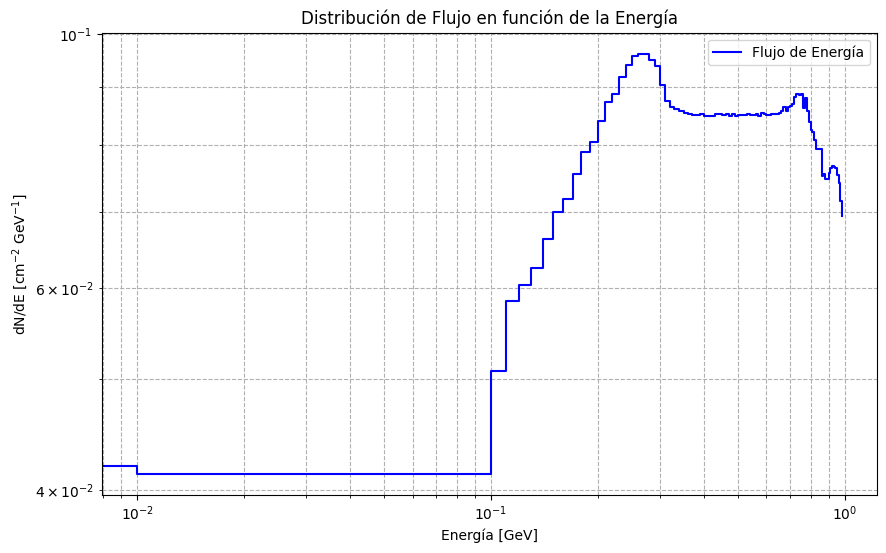

In [6]:
# Cargar los datos procesados
df = pd.read_csv('No_Shielding.csv')

# Graficar el histograma de flujo en función de la energía
plt.figure(figsize=(10, 6))
plt.loglog(df['Emin'], df['dN/dE'], drawstyle='steps-post', color='blue', label='Flujo de Energía')
plt.xlabel('Energía [GeV]')
plt.ylabel('dN/dE [cm$^{-2}$ GeV$^{-1}$]')
plt.title('Distribución de Flujo en función de la Energía')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.show()

## 2. **Gráfico de Barras (Para cada Rango de Energía)**
Este gráfico permite ver la contribución de flujo en cada bin o rango de energía, con barras que representan dN/dE para cada par (Emin, Emax).

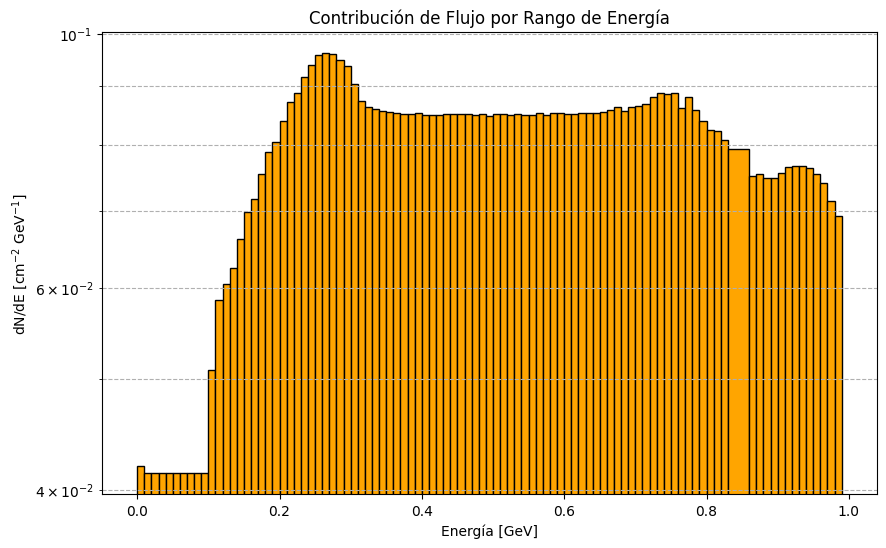

In [7]:
# Calcular el centro de cada bin de energía para posicionar las barras
energy_centers = (df['Emin'] + df['Emax']) / 2

plt.figure(figsize=(10, 6))
plt.bar(energy_centers, df['dN/dE'], width=(df['Emax'] - df['Emin']), align='center', color='orange', edgecolor='black', log=True)
plt.xlabel('Energía [GeV]')
plt.ylabel('dN/dE [cm$^{-2}$ GeV$^{-1}$]')
plt.title('Contribución de Flujo por Rango de Energía')
plt.grid(True, axis='y', which="both", ls="--")
plt.show()

## 3. **Gráfico de Línea de Flujo Acumulativo**
Para visualizar cómo se acumula el flujo a medida que aumenta la energía, puedes calcular el flujo acumulado y graficarlo. Este gráfico es útil para ver qué porcentaje del flujo total se encuentra en rangos de energía bajos o altos.

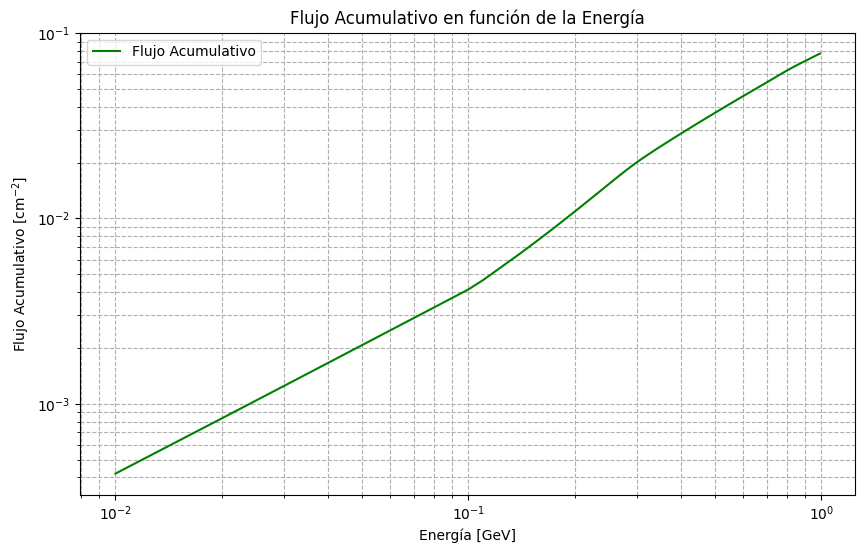

In [8]:
# Calcular flujo acumulado
cumulative_flux = np.cumsum(df['dN/dE'] * (df['Emax'] - df['Emin']))

plt.figure(figsize=(10, 6))
plt.plot(df['Emax'], cumulative_flux, color='green', label='Flujo Acumulativo')
plt.xlabel('Energía [GeV]')
plt.ylabel('Flujo Acumulativo [cm$^{-2}$]')
plt.title('Flujo Acumulativo en función de la Energía')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.xscale('log')
plt.yscale('log')
plt.show()

## 4. **Gráfico de Tasa de Cambio de Flujo por Energía**
Este gráfico muestra cómo cambia el flujo entre los bins de energía. Puedes graficar la diferencia de flujo entre rangos de energía consecutivos.

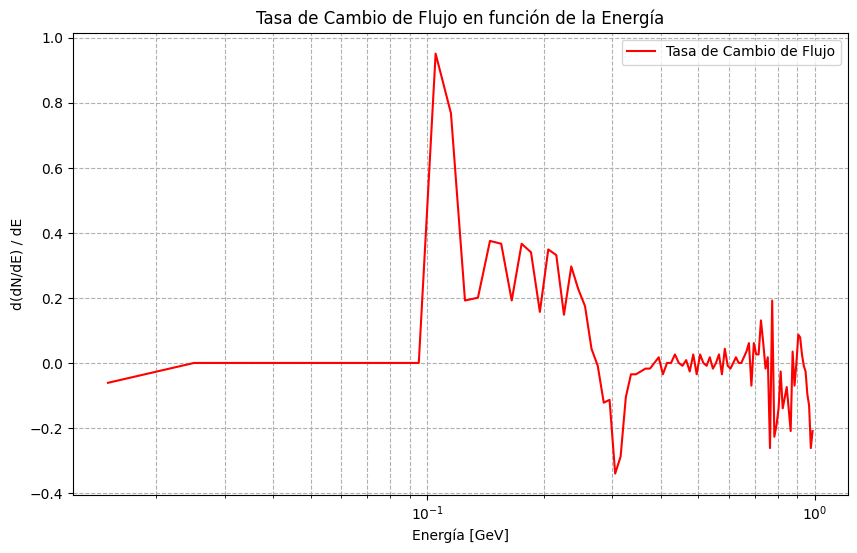

In [9]:
# Calcular la tasa de cambio de flujo entre rangos de energía consecutivos
d_flux = np.diff(df['dN/dE'])
d_energy = np.diff((df['Emin'] + df['Emax']) / 2)

plt.figure(figsize=(10, 6))
plt.plot((df['Emin'][1:] + df['Emax'][1:]) / 2, d_flux / d_energy, color='red', label='Tasa de Cambio de Flujo')
plt.xlabel('Energía [GeV]')
plt.ylabel('d(dN/dE) / dE')
plt.title('Tasa de Cambio de Flujo en función de la Energía')
plt.legend()
plt.grid(True, which="both", ls="--")
plt.xscale('log')
plt.show()